In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [23]:
y_data = pd.read_csv("G:\mozhgan_python\heart.csv")
my_data[0:10]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [46]:
feature1 = my_data[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
X = np.asarray(feature1)
X[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [47]:
y = np.asarray(my_data['output'])

y [0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [48]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.95,  0.68,  1.97,  0.76, -0.26,  2.39, -1.01,  0.02, -0.7 ,
         1.09, -2.27, -0.71, -2.15],
       [-1.92,  0.68,  1.  , -0.09,  0.07, -0.42,  0.9 ,  1.63, -0.7 ,
         2.12, -2.27, -0.71, -0.51],
       [-1.47, -1.47,  0.03, -0.09, -0.82, -0.42, -1.01,  0.98, -0.7 ,
         0.31,  0.98, -0.71, -0.51],
       [ 0.18,  0.68,  0.03, -0.66, -0.2 , -0.42,  0.9 ,  1.24, -0.7 ,
        -0.21,  0.98, -0.71, -0.51],
       [ 0.29, -1.47, -0.94, -0.66,  2.08, -0.42,  0.9 ,  0.58,  1.44,
        -0.38,  0.98, -0.71, -0.51]])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [50]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print(yhat [0:10])

[0 0 1 1 0 0 0 1 1 1]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.97      0.81      0.88        36

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61

Confusion matrix, without normalization
[[24  1]
 [ 7 29]]


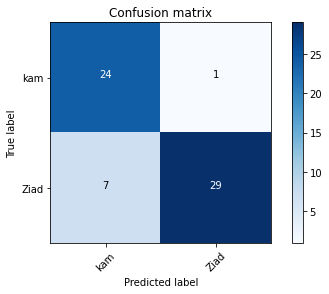

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['kam','Ziad'],normalize= False,  title='Confusion matrix')

In [32]:
my_data['age'].corr(my_data['output'])

-0.22543871587483733

In [33]:
my_data['sex'].corr(my_data['output'])

-0.2809365755017669

In [34]:
my_data['cp'].corr(my_data['output'])

0.43379826150689427

In [35]:
my_data['trtbps'].corr(my_data['output'])

-0.1449311284977516

In [36]:
my_data['chol'].corr(my_data['output'])

-0.08523910513756906

In [37]:
my_data['fbs'].corr(my_data['output'])

-0.028045760272712866

In [38]:
my_data['restecg'].corr(my_data['output'])

0.13722950287377303

In [39]:
my_data['thalachh'].corr(my_data['output'])

0.4217409338106747

In [40]:
my_data['exng'].corr(my_data['output'])

-0.4367570833533031

In [41]:
my_data['oldpeak'].corr(my_data['output'])

-0.4306960016873688

In [42]:
my_data['slp'].corr(my_data['output'])

0.34587707824172487

In [43]:
my_data['caa'].corr(my_data['output'])

-0.3917239923512527

In [44]:
my_data['thall'].corr(my_data['output'])

-0.34402926803831013

In [64]:
feature2= my_data[['exng','cp','oldpeak','thalachh']]
X = np.asarray(feature2)
X[:5]

array([[  0. ,   3. ,   2.3, 150. ],
       [  0. ,   2. ,   3.5, 187. ],
       [  0. ,   1. ,   1.4, 172. ],
       [  0. ,   1. ,   0.8, 178. ],
       [  1. ,   0. ,   0.6, 163. ]])

In [65]:
y = np.asarray(my_data['output'])

y [0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [66]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.7 ,  1.97,  1.09,  0.02],
       [-0.7 ,  1.  ,  2.12,  1.63],
       [-0.7 ,  0.03,  0.31,  0.98],
       [-0.7 ,  0.03, -0.21,  1.24],
       [ 1.44, -0.94, -0.38,  0.58]])

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 4) (242,)
Test set: (61, 4) (61,)


In [68]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print(yhat [0:10])

[1 1 1 1 1 1 0 1 1 1]


              precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.85      0.92      0.88        36

    accuracy                           0.85        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61

Confusion matrix, without normalization
[[19  6]
 [ 3 33]]


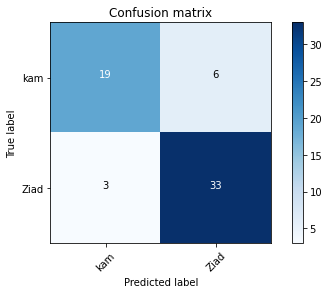

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['kam','Ziad'],normalize= False,  title='Confusion matrix')

In [70]:
feature3 = my_data[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
X = np.asarray(feature3)
X[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [71]:
scaler = preprocessing.StandardScaler().fit(X)
X=scaler.transform(X.astype(float))
print(X[0:5])

[[ 0.95  0.68  1.97  0.76 -0.26  2.39 -1.01  0.02 -0.7   1.09 -2.27 -0.71
  -2.15]
 [-1.92  0.68  1.   -0.09  0.07 -0.42  0.9   1.63 -0.7   2.12 -2.27 -0.71
  -0.51]
 [-1.47 -1.47  0.03 -0.09 -0.82 -0.42 -1.01  0.98 -0.7   0.31  0.98 -0.71
  -0.51]
 [ 0.18  0.68  0.03 -0.66 -0.2  -0.42  0.9   1.24 -0.7  -0.21  0.98 -0.71
  -0.51]
 [ 0.29 -1.47 -0.94 -0.66  2.08 -0.42  0.9   0.58  1.44 -0.38  0.98 -0.71
  -0.51]]


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=10)

In [75]:
yhat = neigh.predict(X_test)
print(yhat[0:5])
print(y[0:5])

[0 0 1 1 0]
[1 1 1 1 1]


In [76]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8388429752066116
Test set Accuracy:  0.8524590163934426


              precision    recall  f1-score   support

           0       0.77      0.92      0.84        25
           1       0.94      0.81      0.87        36

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61

Confusion matrix, without normalization
[[23  2]
 [ 7 29]]


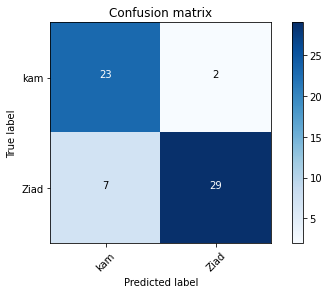

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['kam','Ziad'],normalize= False,  title='Confusion matrix')

In [81]:
feature4 = my_data[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
X = np.asarray(feature4)
X[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [82]:
scaler = preprocessing.StandardScaler().fit(X)
X=scaler.transform(X.astype(float))
print(X[0:5])

[[ 0.95  0.68  1.97  0.76 -0.26  2.39 -1.01  0.02 -0.7   1.09 -2.27 -0.71
  -2.15]
 [-1.92  0.68  1.   -0.09  0.07 -0.42  0.9   1.63 -0.7   2.12 -2.27 -0.71
  -0.51]
 [-1.47 -1.47  0.03 -0.09 -0.82 -0.42 -1.01  0.98 -0.7   0.31  0.98 -0.71
  -0.51]
 [ 0.18  0.68  0.03 -0.66 -0.2  -0.42  0.9   1.24 -0.7  -0.21  0.98 -0.71
  -0.51]
 [ 0.29 -1.47 -0.94 -0.66  2.08 -0.42  0.9   0.58  1.44 -0.38  0.98 -0.71
  -0.51]]


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [84]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1.0,
max_depth=5, random_state=2).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8852459016393442

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        25
           1       0.94      0.81      0.87        36

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61

Confusion matrix, without normalization
[[23  2]
 [ 7 29]]


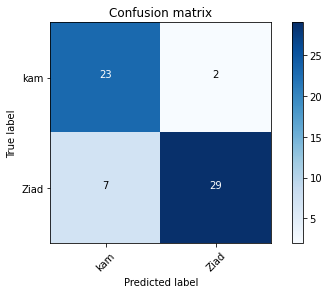

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['kam','Ziad'],normalize= False,  title='Confusion matrix')